Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80161 (313.13 KB)
Trainable params: 80161 (313.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6699 - acc: 0.6158 - val_loss: 0.6195 - val_acc: 0.6860
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5430 - acc: 0.7483 - val_loss: 0.5276 - val_acc: 0.7276
Epoch 3/10
625/625

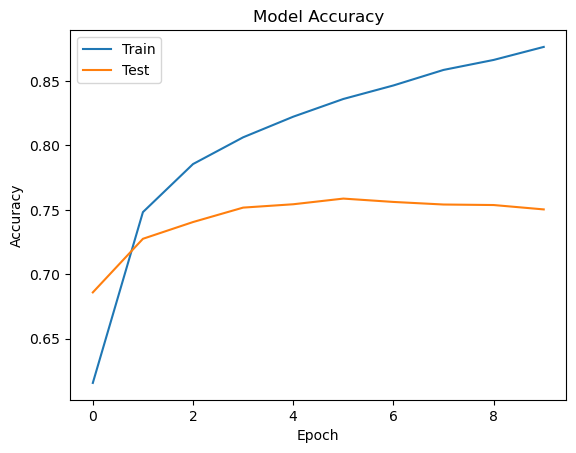

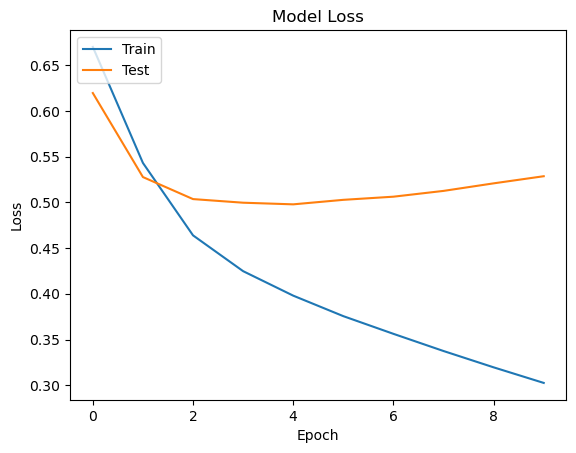

In [1]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt

# Đặt số lượng từ tối đa và độ dài tối đa của mỗi đánh giá
max_features = 10000
maxlen = 20

# Tải dữ liệu IMDB và chia thành tập huấn luyện và tập kiểm thử
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Chuẩn bị dữ liệu bằng cách đảm bảo rằng mọi đánh giá có độ dài bằng nhau
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Xây dựng mô hình Sequential
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile mô hình với các tham số quan trọng
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Hiển thị tóm tắt của mô hình
model.summary()

# Huấn luyện mô hình và lưu trữ lịch sử
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Vẽ biểu đồ độ chính xác trên tập huấn luyện và tập kiểm thử
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Vẽ biểu đồ hàm mất mát trên tập huấn luyện và tập kiểm thử
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
